In [24]:
!pip install --upgrade seaborn -qq
!pip install --upgrade networkx -qq

# Informed search on graphs

## Utilities

In [394]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Node:
    value: Any = 'no'
    heuristic: float = 0
    color: str = 'blue'
    visited: bool = False


@dataclass
class Graph:
    nodes: Any
    edges: Any


def make_graph(nodes, edges):
    nodes = [Node(value=v, heuristic=h) for v, h in nodes]
    return Graph(nodes=nodes, edges=edges)

In [451]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_spring_graph(graph, seed=1, figsize=(8, 8)):
    nodes = graph.nodes
    edges = []
    for node, children in graph.edges.items():
        for c, weight in children:
            edges.append((node, c, weight))
        
    G = nx.Graph()
    for n in nodes:
        G.add_node(n.value)

    for f, t, _ in edges:
        G.add_edge(f, t)

    pos = nx.layout.spring_layout(G, seed=seed)

    plt.figure(figsize=figsize)

    nx.draw_networkx_edges(G, pos, alpha=1, width=3)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n.value for n in nodes],
        node_size=1000,
        node_color=[n.color for n in nodes],
    )
    nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes}, font_size=20, font_color='white', font_weight='bold')

    edge_labels = dict([((n1, n2), f'{w}') for n1, n2, w in edges])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
    label_pos=0.5,
    font_size=20)

    # Set margins for the axes so that nodes aren't clipped

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()

## Examples

In [452]:
g = make_graph(
    nodes=[('Z', 11), ('S', 8), ('A', 7), ('B', 5), ('C', 4),
           ('D', 6 ), ('E', 6), ('F', 3), ('G', 0), ('H', 9),
           ('I', 8 ), ('J', 7), ('K', 8)],
    edges={
        'Z': [('S', 3)],
        'S': [('A', 2), ('B', 3)],
        'A': [('C', 4)],
        'B': [('D', 2)],
        'C': [('G', 4)],
        'D': [('E', 2), ('H', 3), ('I', 3)],
        'E': [('J', 2), ('F', 3)],
        'F': [('G', 3)],
        'J': [('K', 2)]
    }
)

In [473]:
g.nodes[1].color = 'orange'
g.nodes[8].color = 'green'

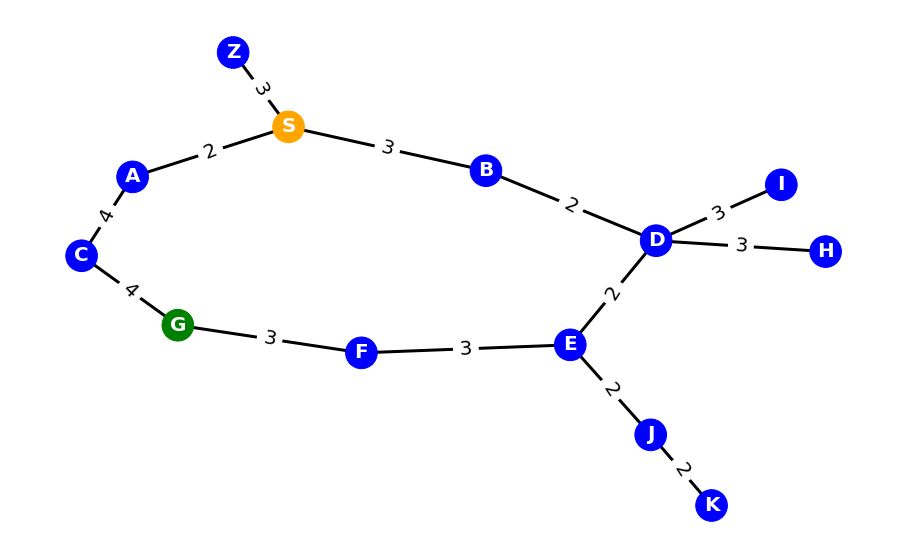

In [474]:
draw_spring_graph(g, seed=100, figsize=(16, 10))

In [475]:
def greedy(g, start):
    queue = [start]
    visited = set()

    while len(queue) > 0:
        current = queue.pop()
        
        if current is visited:
            continue
        

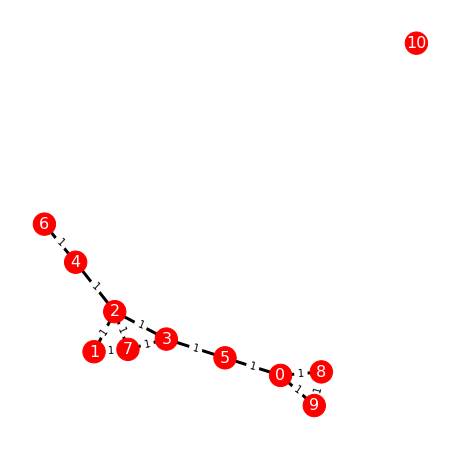

In [341]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.generators.random_regular_graph(d=4, n=10)
G = nx.random_geometric_graph(10, 0.3, seed=0)
# G = nx.Graph()
# G.add_edge(1, 2, weight=2)
# G.add_edge(1, 3)
# G.add_edge(1, 5)
# G.add_edge(2, 3)
# G.add_edge(3, 4)
# G.add_edge(4, 5)
G.add_node(10)

# pos = nx.layout.kamada_kawai_layout(G)
pos = nx.layout.spring_layout(G, seed=1)


plt.figure(figsize=(8, 8)) 

nx.draw_networkx_edges(G, pos, alpha=1, width=3)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=G.nodes,
    node_size=500,
    node_color=['r'] * len(G.nodes),
)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes}, font_size=16, font_color='white')

edge_labels = dict([((n1, n2), f'1')
                    for n1, n2 in G.edges])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set margins for the axes so that nodes aren't clipped

ax = plt.gca()
ax.margins(0.1)
plt.axis("off")
plt.show()

In [13]:
nx

<module 'networkx' from '/home/izpc/anaconda3/lib/python3.7/site-packages/networkx/__init__.py'>